# Kaggle Titanic 监督学习教程

## 1. Kaggle简介

[Kaggle](http://www.kaggle.com) 是一个人们创建算法并与世界各地的机器学习实践者竞争的网站。如果你的算法在特定的数据集上是最精确的，你的算法就会赢得比赛。Kaggle是练习机器学习技能的有趣方式。

在这次任务中，我们将学习如何参Kaggle比赛。在本次介绍性任务中，我们将学习：

* 如何参加Kaggle比赛
* 探索比赛数据，了解比赛主题
* 如何为机器学习准备数据
* 训练一个模型
* 度量模型的精度
* 准备并完成您的第一个Kaggle提交。

Kaggle为初学者设计了许多比赛。其中最受欢迎的比赛，也是我们将关注的比赛，是关于预测泰坦尼克号沉没后幸存的乘客，即[泰坦尼克号](https://www.kaggle.com/c/titanic)比赛。

每个Kaggle比赛都有两个关键数据文件——一个训练集和一个测试集。

In [1]:
import pandas as pd

test = pd.read_csv("./test.csv")
test_shape = test.shape
print('test_shape:', test_shape)
print('test type is: ', type(test))

test_shape: (418, 11)
test type is:  <class 'pandas.core.frame.DataFrame'>


### 说明

使用 ```pandas.read_csv()``` 读取 ```train.csv``` 文件并赋给变量 ```train```。
使用 ```DataFrame.shape``` 计算 ```train``` 的行数和列数, 并将结果赋给变量 ```train_shape```。

In [2]:
train = pd.read_csv("./train.csv")
train_shape = train.shape
print('train_shape:', train_shape)

train_shape: (891, 12)


## 2. 浏览数据

我们在前面读到的文件可以在kaggle上泰坦尼克号比赛的数据页上找到。该页面还有一个数据字典，它解释组成数据集的各个列的含义。以下是该数据字典中包含的说明：

* *PassengerID* - 一个用以标记每个乘客的数字id
* *Survived* - 标记乘客是否幸存——幸存(1)、死亡(0)。我们将预测这一列
* *Pclass* - 标记乘客所属船层——第一层(1),第二层(2),第三层(3)
* *Name* - 乘客名字
* *Sex* - 乘客性别
* *Age* - 乘客年龄
* *SibSp* - 船上兄弟姐妹和配偶的数量
* *Parch* - 船上父母和孩子的数量
* *Ticket* - 乘客的船票号码
* *Fare* - 乘客为船票付了多少钱
* *Cabin* - 乘客的船舱号码
* *Embarked* - 乘客从哪个港口登上泰坦尼克号 (C=瑟堡, Q=皇后镇, S=南安普敦)

### 让我们看看实际的数据

In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


我们将要进行的机器学习类型称为分类（classification），因为当我们进行预测时，我们将每个乘客分类为幸存或没有幸存。更具体地说，我们正在进行二分类（binary classification），这意味着我们只对两种不同的状态进行分类。

在任何机器学习练习中，对所预测的主题进行思考都是非常重要的。我们称之为获取领域知识的步骤，它是机器学习成功的最重要的决定因素之一。

在这种情况下，了解泰坦尼克号的灾难，特别是哪些变量可能影响生存的结果是非常重要的。任何看过电影《泰坦尼克号》的人都会记得，妇女和儿童比登上救生艇的优先级更高（就像他们在现实生活中一样）。你也会记得乘客之间巨大的阶级差异。

这表明`Age`、`Sex`和`Pclass`可能是存活率的良好预测因子。我们将通过数据可视化来进行数据分析。

因为幸存列包含0（如果乘客没有幸存）和1（如果乘客幸存），我们可以按性别分割数据并计算此列的平均值。我们可以使用`dataframe.pivot_table()`计算：

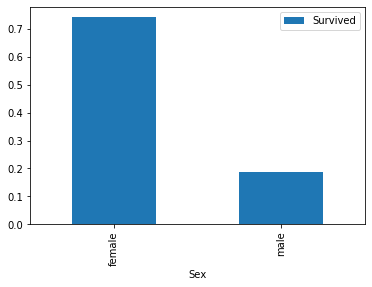

In [6]:
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot

sex_pivot.plot.bar()
plt.show()

我们可以立即看到，女性存活的比例远远高于男性。

我们也可以对 `Pclass` 列进行同样的计算。

### 说明

* 使用 ```DataFrame.pivot_table()``` 对 ```train``` 进行数据透视处理:
    * 使用 "Pclass" 作为索引参数。
    * 使用 "Survived" 作为值。
* 使用 ```DataFrame.plot.bar()``` 绘制数据透视表。

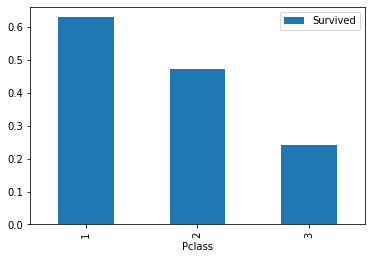

In [9]:
pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
# pclass_pivot
pclass_pivot.plot.bar()
plt.show()

## 3. 探索和转换年龄列

`Sex` 和 `Pclass` 列是我们称之为分类特征的列。这意味着这些值代表了几个独立的选项（例如，乘客是男性还是女性）。

可以使用 [```Series.describe()```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html)来显示数据：

In [10]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

“年龄”列包含从0.42到80.0的数字（如果您查看Kaggle的数据页，它会告诉我们，如果乘客少于1岁，年龄是小数）。这里要注意的另一件事是，这个列中有714个值，比我们在本次任务之前发现的814行少，这表明我们有一些丢失的值。

所有这些都意味着年龄列需要稍微区别对待，因为这是一个连续的数字列。查看连续数值集中值分布的一种方法是使用直方图。我们可以创建两个柱状图，直观地比较不同年龄段存活者与死亡者：

In [11]:
train[train["Survived"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


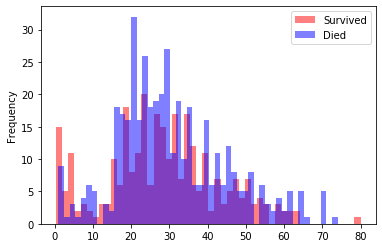

In [12]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

这里的关系并不简单，但我们可以看到，在某些年龄段，存活下来的乘客更多——红色条比蓝色条高。

为了使这对我们的机器学习模型有用，我们可以通过将这个连续的特征划分为一个范围来将其分为一个类别特征。我们可以使用 ```pandas.cut()``` 函数来帮助我们。

```pandas.cut()``` 函数有两个必需的参数—我们要剪切的列和定义剪切边界的数字列表。我们还将使用可选的参数标签，它为生成的容器获取一个标签列表。这将使我们更容易理解我们的结果。

在修改该列之前，我们必须注意两件事。首先，我们对训练数据的任何更改，我们也需要对测试数据进同样行更改，否则我们将无法使用我们的模型对提交的数据进行预测。其次，我们需要记住处理上面观察到的缺失值。

我们同时对 ```train``` 和 ```test``` 数据帧（dataframes）进行处理。

```python
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,18,100]
label_names = ["Missing","Child","Adult"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)
```

下图显示了该函数如何转换数据：

![](https://s3.amazonaws.com/dq-content/185/cut.svg)

请注意，`cut_points` 列表比 `label_names` 列表多了一个元素，因为它需要定义最后一个分段的上边界。

### 说明

* 创建 ```cut_points``` 和 ```label_names``` 列表将 ```Age``` 列划分为6个类别：
    * Missing, 从 -1 到 0
    * Infant, 从 0 到 5
    * Child, 从 5 到 12
    * Teenager, 从 12 到 18
    * Young Adult, 从 18 到 35
    * Adult, 从 35 到 60
    * Senior, 从 60 到 100
* 将 ```process_age()``` 函数运用到训练数据帧, 将结果赋给 `train`。
* 将 ```process_age()``` 函数运用到测试数据帧, 将结果赋给 `test`。
* 使用 ```DataFrame.pivot_table()``` 基于 `Age_categories` 列对训练数据帧对透视表。
* 使用 ```DataFrame.plot.bar()``` 绘制数据透视表。

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


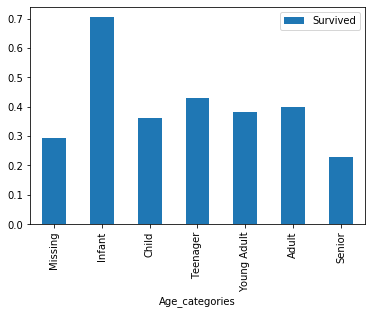

In [12]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(train,cut_points,label_names)
print(type(train))
test = process_age(test,cut_points,label_names)
print(type(test))

age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

## 4. 为机器学习准备数据

到目前为止，我们已经确定了三个可能有助于预测存活率的列：

* Sex
* Pclass
* Age/Age_categories

在我们建立模型之前，我们需要为机器学习准备这些数据列。大多数机器学习算法无法理解文本标签，因此我们必须将文本值转换为数字。

In [16]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

虽然每个乘客的等级之间确实存在某种有序关系，但每个等级之间的关系与数字1、2和3之间的关系并不相同。例如，类2的“价值”不是类1的两倍，类3的“价值”不是类1的三倍。

为了删除此关系，我们可以为 `pClass` 中的每个唯一值创建虚拟列：

![](https://s3.amazonaws.com/dq-content/185/kaggle_get_dummies.svg)

让我们使用该函数为 `Sex` 和 `Age_categories` 类别列创建虚拟列。

### 说明

* 使用 `create_dummies()` 函数为 `Sex` 列创建虚拟变量（dummy variables）：
    * 在训练数据帧中
    * 在测试数据帧中
* 使用 `create_dummies()` 函数为 `Age_categories` 列创建虚拟变量（dummy variables）：
    * 在训练数据帧中
    * 在测试数据帧中

In [14]:
column_name = "Pclass"
df = train
dummies = pd.get_dummies(df[column_name],prefix=column_name)
dummies.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [16]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,1,0,0,1


In [17]:
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")
train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


## 5. 创建我们的第一个机器学习模型

现在数据已经准备好了，就可以开始训练的第一个机器学习模型了。我们将使用的第一个模型称为Logistic回归（Logistic Regression），这通常是在进行分类时要训练的第一个模型。

我们将使用 `scikit-learn` 机器学习库，因为它有许多工具，使机器学习更容易。`scikit-learn` 工作流包括四个主要步骤：

* 初始化/创建机器学习模型对象
* 使用训练数据训练模型
* 使用模型进行预测
* 对预测精度进行评估
* `scikit-learn` 中的每一个机器学习模型都以一个单独的类进行实现，因此我们将要使用 `LogisticRegression` 类来创建模型对象：

我们首先导入库和类:

```python
from sklearn.linear_model import LogisticRegression
```

其次创建类 `LogisticRegression` 的对象:

```python
lr = LogisticRegression()
```

最后，我们使用 ```LogisticRegression.fit()``` 方法来训练我们的模型。```LogisticRegression.fit()``` 方法接受两个参数：X和y。X必须是要训练模型的特征的二维数组（如数据帧），y必须是目标的一维数组（如序列）或要预测的列。

```python
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(train[columns], train['Survived'])
```

The code above fits (or trains) our LogisticRegression model using three columns: Pclass_2, Pclass_3, and Sex_male.

上面的代码使用三列来拟合（或训练）我们的 `LogisticsRegression` 模型：`Pclass_2`、`Pclass_3和sex_male。

### 说明

* 实例化 `LogisticRegression` 对象 `lr`。
* 使用 `LogisticRegression.fit()` 方法对训练数据进行拟合。

In [19]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 6. 对训练数据进行划分

恭喜你，你已经训练了你的第一个机器学习模型！我们的下一步是找出我们的模型有多精确，要做到这一点，我们必须做出一些预测。

如果您还记得以前的情况，我们确实有一个测试数据帧，可以用来进行预测。我们可以对这个数据集进行预测，但是因为它没有幸存者的列，所以我们必须将它提交给 Kaggle 网站来确定我们模型的准确性。如果我们每次优化模型时都必须提交以检查准确性，这将很快成为一个难题。

我们也可以在我们的训练数据帧上进行拟合和预测，但是如果我们这样做，我们的模型很可能会过拟合，这意味着它会在训练集上表现良好，因为我们正在测试我们训练过的相同数据，但随后在新的、看不见的数据上表现更差。

我们可以把训练集分成两个部分：

* 用于训练模型的部分（通常为整个训练集的80%）
* 用于测试模型的部分 (通常为整个训练集的20%）

机器学习的惯例是把这两部分称为训练集和测试集。这可能会变得有些混淆，因为我们已经有了测试数据帧，我们最终将使用它来进行预测，以提交给 Kaggle网站。为了避免混淆，从这里开始，我们将这个 Kaggle 测试数据称为留出数据（holdout data），这是为用于最终预测的这类数据命名的技术名称。

`scikit-learn` 有一个方便的函数 [```model_selection.train_test_split()```](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 可以用于数据划分。 `train_test_split()` 函数接受两个参数： ```X``` 和 ```y```， 然后返回四个对象： ```train_X, train_y, test_X, test_y```：

![](https://s3.amazonaws.com/dq-content/185/kaggle_train_test_split.svg)

进行数据划分的基本语法是：

```python
from sklearn.model_selection import train_test_split

columns = ['Pclass_2', 'Pclass_3', 'Sex_male']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2, random_state=0)
```

您会注意到，我们还使用了另外两个参数：```test_size```，它允许我们控制将数据分割成什么比例，以及```random_state```。```train_test_split()```函数在分割观测值之前将观测值随机化，设置一个随机种子意味着我们的结果将是可重复的，这对于协作或每次都需要生成一致的结果非常重要。

### 说明

* 使用 `model_selection.train_test_split()` 对训练集进行划分：
    * `test_size` 为 0.2
    * `random_state` 为 0
* 将返回对象赋值给：`train_X`, `test_X`, `train_y` 和 `test_y`。

In [21]:
# from now on we will refer to thisdataframe as the holdout data.
holdout = test 

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2,random_state=0)

In [22]:
print(train_X.shape)
print(test_X.shape)

(712, 15)
(179, 15)


## 7. 预测并度量其准确性

现在我们已经将数据分为训练集和测试集，我们可以在训练集上再次拟合我们的模型，然后使用该模型对我们的测试集进行预测。

一旦我们训练好模型， 我们就能够使用 ```LogisticRegression.predict()``` 方法进行预测。

```predict()``` 方法接受一个参数```X```，这是一个二维特征数组，用于我们希望预测的观测值。```X``` 必须具有与我们用来拟合模型的数组完全相同的特征。该方法返回一维预测数组。

```python
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
```

有很多方法可以度量机器学习模型的精度，但是在 Kaggle 比赛中，您希望确保使用与 Kaggle 用于计算特定比赛精度相同的方法。

在这种情况下，[the evaluation section for the Titanic competition on Kaggle](https://www.kaggle.com/c/titanic#evaluation) 告诉我们，我们的分数计算为“乘客正确预测的百分比”。这是迄今为止最常见的二分类精度形式。

举个例子，假设我们预测的是一个由5个观测值组成的小数据集。

|Our model's prediction|The actual value|Correct|
|----------------------|----------------|-------|
|0                     |0               |Yes    |
|1                     |0               |No     |
|0                     |1               |No     |
|1                     |1               |Yes    |
|1                     |1               |Yes    |

在这种情况下，我们的模型正确地预测了五个值中的三个，因此基于该预测集的精度将为60%。

同样，`scikit-learn` 有一个方便的功能可以用来计算模型的精度：[```metrics.accuracy_score()```](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)。整个函数接受两个参数： ```y_true``` 和 ```y_pred```，分别是实际值和我们的预测值，并返回我们的准确度得分。

```python 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
```

### 说明

* 实例化 ```LogisticRegression()``` 对象 ```lr```。
* 使用 ```train_X``` 和 ```train_y``` 拟合模型。
* 使用 ```test_X``` 进行预测并将结果赋给 ```predictions```。
* 使用 ```accuracy_score()``` 对 ```test_y``` 和 ```predictions``` 进行比较，将结果赋给 ```accuracy```。
* 输出 ```accuracy``` 变量的值。

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
accuracy

0.8100558659217877

In [25]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

,Survived,Died
Survived,96,14
Died,20,49


## 使用交叉验证进行更精确的误差测量

当与20%的测试集进行测试时，我们的模型的准确度得分为81.0%。考虑到这个数据集非常小，我们的模型很有可能是过拟合的，并且不会在完全看不见的数据上表现得那么好。

为了让我们更好地了解模型的实际性能，我们可以使用一种称为**交叉验证**（ cross-validation）的技术，在不同的数据分割上训练和测试我们的模型，然后平均准确度得分。

![](https://s3.amazonaws.com/dq-content/185/kaggle_cross_validation.svg)

最常见的交叉验证形式，也就是我们将要使用的交叉验证形式，叫做**k-fold**交叉验证。“fold”是指我们训练模型的每个不同迭代，“k”只是指折叠次数。在上图中，我们演示了k倍验证，其中k是5。

我们会使用 `scikit-learn` 的 [```model_selection.cross_val_score()```](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) 函数进行交叉验证。用于 ```cross_val_score()``` 的基本语法是：

```python
cross_val_score(estimator, X, y, cv=None)
```

* `estimator` 是 `scikit-learn` 预测对象，例如 `LogisticRegression()` 对象。
* `X` 是数据集中的所有特征。
* `y` 目标标签。
* `cv` 表示折叠次数。

这个函数用 numpy 数组返回每次验证的精度分数。

值得注意的是，```cross_val_score()```函数可以使用多种交叉验证技术和评分类型，但它默认为我们输入类型的 `k-fold` 和准确度评分。

### 说明

* 实例化 `LogisticRegression()` 对象 `lr`。
* 使用 `model_selection.cross_val_score()` 进行交叉验证：
    * 使用 `lr` 作为预测器。
    * 使用 `all_X` 和 `all_y` 作为输入数据。
    * k = 10。
* 使用 `numpy.mean()` 函数计算分数的平均值。
* 输出结果。

In [26]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, all_X, all_y, cv=10)
print(scores.shape)
np.mean(scores)

(10,)


0.8024670865963002

## 9. 对新的数据进行预测

从我们的k-fold验证的结果中，你可以看到准确率的数字随着每一次的变化而变化，范围在76.4%到87.6%之间。这说明了为什么交叉验证很重要。

碰巧的是，我们的平均准确度得分是80.2%，这与我们从简单的训练/测试分离中得到的81.0%相差不远。但是情况并非总是如此，您应该始终使用交叉验证来确保您从模型中得到的错误度量是准确的。

我们现在已经准备好使用我们已经建立的模型来训练我们的最终模型，然后对留出数据或 Kaggle 所称的“测试”数据集进行预测。

### 说明

* 实例化 ```LogisticRegression()``` 对象 ```lr```。
* 使用 ```fit()``` 训练模型，基于数据 ```all_X``` 和 ```all_y```。
* 使用数据 ```holdout``` 进行预测，将结果赋给 ```holdout_predictions```。

In [17]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

In [18]:
holdout.head()

NameError: name 'holdout' is not defined

In [29]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])
print(holdout_predictions.shape)
holdout_predictions

(418,)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

## 10. 创建提交文件

The last thing we need to do is create a submission file. Each Kaggle competition can have slightly different requirements for the submission file. Here's what is specified on the [Titanic competition evaluation page](https://www.kaggle.com/c/titanic#evaluation):

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)
The table below shows this in a slightly easier to understand format, so we can visualize what we are aiming for.

|PassengerId|Survived|
|-----------|--------|
|892        |0       |
|893        |1       |
|894        |0       |

We will need to create a new dataframe that contains the holdout_predictions we created in the previous screen and the PassengerId column from the holdout dataframe. We don't need to worry about matching the data up, as both of these remain in their original order.

To do this, we can pass a dictionary to the [```pandas.DataFrame()``` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html):

```python
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
```

Finally, we'll use the [```DataFrame.to_csv()``` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html) to save the dataframe to a CSV file. We need to make sure the index parameter is set to False, otherwise we will add an extra column to our CSV.

### 说明

* 创建一个数据帧提交以匹配 Kaggle 的要求。
* 使用 ```to_csv()``` 方法将 ```submission``` 数据帧保存到文件 ```submission.csv```。

In [30]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
print(submission.shape)
print(submission[1:10])
submission.to_csv('titanic_submission.csv', index=False)

(418, 2)
   PassengerId  Survived
1          893         0
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


## 11. 完成Kaggle比赛的首次提交

现在我们有了提交文件，我们可以通过点击比赛页面上的蓝色“提交预测”按钮开始向 Kaggle 网站进行提交。

![](https://s3.amazonaws.com/dq-content/185/kaggle_submit.jpg)

然后系统会提示您上传CSV文件，并添加提交的简要说明。当你提交你的文件时，Kaggle会处理你的预测，并给出你的留出数据和你的排名的准确性。完成处理后，您将看到我们的第一次提交获得0.75598或75.6%的准确率分数。

![](https://s3.amazonaws.com/dq-content/185/submission_rank.png)

与交叉验证得到的80.2%的准确率相比，我们在留出数据上的准确率为75.6%，这一事实表明我们的模型与我们的训练数据有点过拟合。

75.6%的准确率在7954人中排名6663。在你第一次提交后，很容易看到 Kaggle 的排行榜，并感到气馁，但请记住，这只是一个起点。

在 `泰坦尼克号` 比赛排行榜的榜首出现少数100%的分数，这也是非常普遍的。实际上，任何在这场比赛中得分90%左右的人都有可能作弊（很容易在网上查到被拒乘客的姓名，看看他们是否幸存）。

## 12. 下一步

我们可以做很多事情来提高模型的准确性：

* 特征改进：
    * 特征工程：从已有数据中创建新的特征。
    * 特征选择：选择最相关的数据以减少噪声和过拟合。
* 模型改进：
    * 模型选择：选择不同的模型以提高性能。
    * 超参数优化： 对不同机器学习模型的参数进行优化。

## 资源

* https://www.dataquest.io/course/kaggle-fundamentals

## 进一步阅读

* https://github.com/justmarkham/scikit-learn-videos